In [1]:
import joblib
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv('maize.csv')

In [3]:
data.head()

,SALES,TEMPERATURE(°C),RAINFALL (mm),OPERATING COSTS(1 hacter),CROP NAME,MONTH,YEAR,REGION,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,medium sales,24.2,93.0,374200,MAIZE,january,1995,DODOMA,NaN,NaN,NaN
1,medium sales,23.9,69.0,374200,MAIZE,february,1995,DODOMA,NaN,NaN,NaN
2,medium sales,23.2,50.4,374200,MAIZE,march,1995,DODOMA,NaN,NaN,NaN
3,medium sales,22.7,7.7,374200,MAIZE,april,1995,DODOMA,NaN,NaN,NaN
4,high sales,22.3,17.8,374200,MAIZE,may,1995,DODOMA,NaN,NaN,NaN


In [4]:
data.columns

Index(['SALES', 'TEMPERATURE(°C)', 'RAINFALL (mm)',
       'OPERATING COSTS(1 hacter)', 'CROP NAME', 'MONTH', 'YEAR', 'REGION',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SALES                      348 non-null    object 
 1   TEMPERATURE(°C)            348 non-null    float64
 2   RAINFALL (mm)              348 non-null    float64
 3   OPERATING COSTS(1 hacter)  348 non-null    int64  
 4   CROP NAME                  348 non-null    object 
 5   MONTH                      348 non-null    object 
 6   YEAR                       348 non-null    int64  
 7   REGION                     348 non-null    object 
 8   Unnamed: 8                 0 non-null      float64
 9   Unnamed: 9                 0 non-null      float64
 10  Unnamed: 10                3 non-null      object 
dtypes: float64(4), int64(2), object(5)
memory usage: 30.0+ KB


In [6]:
# drop 8,9 and 10 since they are null values
# drop region and crop name since they have no effect on the crop sales. (same for all observations)
cleaned_data = data.drop(columns = ['REGION','CROP NAME','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis = 1)

convert sales into numerical labels, where low = 0, medium = 1, high = 2

In [7]:
print("Sales: ",cleaned_data['SALES'].unique())
print("\n")
print("Months: ", cleaned_data['MONTH'].unique())

Sales:  ['medium sales' 'high sales' 'low sales']


Months:  ['january' 'february' 'march' 'april' 'may' 'june' 'july' 'august'
 'september' 'october' 'november' 'december']


In [8]:
def encode_labels(data_column):
    """ encode labels """
    def label_dict(uniques):
        """ returns key-value pair of the values. """
        uniques = list(uniques)
        unique_dict = dict()
        for uni in range(0, len(uniques)):
            unique_dict[str(uniques[uni])] = uni
        return unique_dict
    
    label_encoder = preprocessing.LabelEncoder()
    encoded_column = label_encoder.fit_transform(data_column)
    column_dict = label_dict(data_column.unique())
    return column_dict, encoded_column

In [9]:
sales_dict1, sales_column = encode_labels(cleaned_data['SALES'])
month_dict, month_column = encode_labels(cleaned_data['MONTH'])
sales_dict = dict((y,x) for x,y in sales_dict1.items())

In [10]:
cleaned_data['SALES'] = sales_column
cleaned_data['MONTH'] = month_column

In [11]:
cleaned_data.head()

,SALES,TEMPERATURE(°C),RAINFALL (mm),OPERATING COSTS(1 hacter),MONTH,YEAR
0,2,24.2,93.0,374200,4,1995
1,2,23.9,69.0,374200,3,1995
2,2,23.2,50.4,374200,7,1995
3,2,22.7,7.7,374200,0,1995
4,0,22.3,17.8,374200,8,1995


In [12]:
cleaned_data.corr()

,SALES,TEMPERATURE(°C),RAINFALL (mm),OPERATING COSTS(1 hacter),MONTH,YEAR
SALES,1.000000e+00,0.351061,0.323369,3.896450e-16,-2.765850e-01,-5.326353e-16
TEMPERATURE(°C),3.510610e-01,1.000000,0.488143,-4.890224e-02,6.425299e-02,-3.721921e-02
RAINFALL (mm),3.233692e-01,0.488143,1.000000,-9.674792e-02,-3.008295e-01,-8.725688e-02
OPERATING COSTS(1 hacter),3.896450e-16,-0.048902,-0.096748,1.000000e+00,-6.308172e-16,9.092926e-01
MONTH,-2.765850e-01,0.064253,-0.300830,-6.308172e-16,1.000000e+00,-1.489364e-16
YEAR,-5.326353e-16,-0.037219,-0.087257,9.092926e-01,-1.489364e-16,1.000000e+00


# Remove Multicollinearity 
to prevent multi corlieanirty we will use one of TEMPERATURE or Rainfall, since they are strongly corellated

In [13]:
# we shall remove RAINFALL (mm) since it has a smalller corellation to sales
cleaned_data = cleaned_data.drop(columns=['RAINFALL (mm)'])

In [14]:
cleaned_data.columns

Index(['SALES', 'TEMPERATURE(°C)', 'OPERATING COSTS(1 hacter)', 'MONTH',
       'YEAR'],
      dtype='object')

In [15]:
features = cleaned_data.copy()
target  = features.pop('SALES')

# Feature Importance

refers to the techniques that assign a score to input
features based on how useful they are in predicting a target variable. You can use the corellation scoresto select the important features

In [16]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(features, cleaned_data['SALES'])
mi_scores

MONTH                        1.066106
TEMPERATURE(°C)              0.608082
OPERATING COSTS(1 hacter)    0.000000
YEAR                         0.000000
Name: MI Scores, dtype: float64

<AxesSubplot:xlabel='TEMPERATURE(°C)', ylabel='MONTH'>

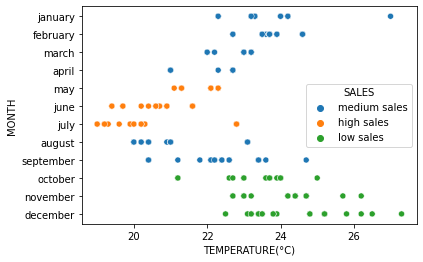

In [17]:
sns.scatterplot(y='MONTH', x="TEMPERATURE(°C)",data=data,hue="SALES")

since the year and the operating costs have less weights towards contributing to predicting the sales, we drop them

In [18]:
actual_x = features.drop(columns=['OPERATING COSTS(1 hacter)','YEAR'])
actual_y = target

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(actual_x, actual_y, test_size=0.25, random_state = 20)

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
# create model instance
model = GaussianNB()

In [22]:
x_train.columns

Index(['TEMPERATURE(°C)', 'MONTH'], dtype='object')

In [23]:
# train the model
model.fit(x_train, y_train)

GaussianNB()

In [24]:
filename = 'maize_model.pkl'
joblib.dump(model, filename)

['maize_model.pkl']

In [25]:
y_predicted = model.predict(x_test)

In [26]:
train_score = model.score(x_train, y_train)
print("The training score of model is: ", train_score)

The training score of model is:  0.7854406130268199


In [27]:
test_score = model.score(x_test, y_test)
print("The score of the model on test data is:", test_score )

The score of the model on test data is: 0.7241379310344828


# PREDICTION IN JANUARY AT 25C

In [28]:
temp  = 25 #12
month = 'January' #'February'
maize_price = model.predict([[temp, month_dict[month.lower()]]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [29]:
"Maize price in {} is of  {} ".format(month, sales_dict[list(maize_price)[0]])

'Maize price in January is of  low sales '

# OUTPUT VISUALISATIONS AND METRICS

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


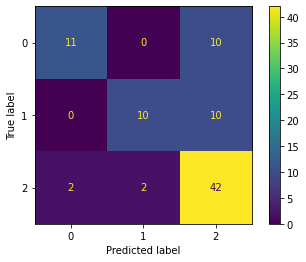

In [31]:
plot_confusion_matrix(model, x_test, y_test)

# MODEL ACCURACY SCORE

In [32]:
"This means for any value of temperature and month entered \n the price predicted is accurate by  {} %".format(accuracy_score(y_test, y_predicted)*100)

'This means for any value of temperature and month entered \n the price predicted is accurate by  72.41379310344827 %'